In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
np.random.seed(7)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [8]:
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [9]:
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
1563/1563 [==============================] - 302s 192ms/step - loss: 1.6841 - accuracy: 0.3892 - val_loss: 1.3400 - val_accuracy: 0.5142
Epoch 2/5
1563/1563 [==============================] - 316s 202ms/step - loss: 1.3216 - accuracy: 0.5272 - val_loss: 1.1922 - val_accuracy: 0.5684
Epoch 3/5
1563/1563 [==============================] - 316s 202ms/step - loss: 1.1505 - accuracy: 0.5912 - val_loss: 1.1238 - val_accuracy: 0.6010
Epoch 4/5
1563/1563 [==============================] - 310s 199ms/step - loss: 1.0075 - accuracy: 0.6454 - val_loss: 1.0171 - val_accuracy: 0.6423
Epoch 5/5
1563/1563 [==============================] - 296s 189ms/step - loss: 0.8995 - accuracy: 0.6832 - val_loss: 0.9656 - val_accuracy: 0.6657


In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.57%


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

# Fixing the  random seed for reproducibility
np.random.seed(7)

# Loading the  data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizing inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compiling model
epochs = 5
learn_rate = 0.01
decay_rate = learn_rate / epochs
sgd = SGD(lr=learn_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

170498071/170498071 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 598s 381ms/step - loss: 1.9256 - accuracy: 0.2889 - val_loss: 1.6807 - val_accuracy: 0.3877
Epoch 2/5
1563/1563 [==============================] - 598s 382ms/step - loss: 1.5471 - accuracy: 0.4336 - val_loss: 1.4688 - val_accuracy: 0.4670
Epoch 3/5
1563/1563 [==============================] - 594s 380ms/step - loss: 1.4079 - accuracy: 0.4881 - val_loss: 1.3898 - val_accuracy: 0.4968
Epoch 4/5
1563/1563 [==============================] - 584s 374ms/step - loss: 1.3209 - accuracy: 0.5222 - val_loss: 1.2574 - val_accuracy: 0.5492
Epoch 5/5
1563/1563 [==============================] - 575s 368ms/step - loss: 1.2645 - accuracy: 0.5439 - val_loss: 1.2194 - val_accuracy: 0.5616
Accuracy: 56.16%


In [2]:
# Predicting the first 4 images of the test data
predns = model.predict(X_test[:4])
# Converting the predictions to class labels
predicted_lbls = np.argmax(predns, axis=1)
# Converting the actual labels to class labels
actual_lbls = np.argmax(y_test[:4], axis=1)

# Printing the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_lbls)
print("Actual labels:   ", actual_lbls)

1/1 [==============================] - 0s 243ms/step
Predicted labels: [3 1 8 8]
Actual labels:    [3 8 8 0]


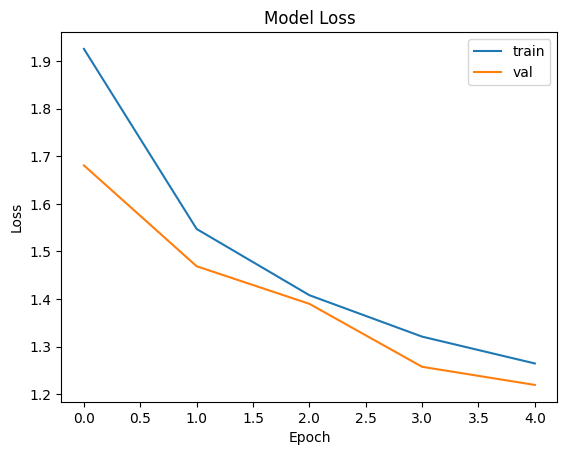

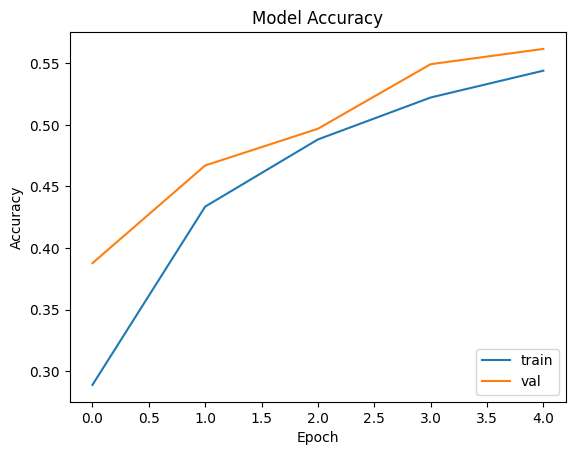

In [3]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()